<a href="https://colab.research.google.com/github/BeushevArtem/project/blob/main/April25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamNum
0,1,0,Работяга,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,Работяга,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,Работяга,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


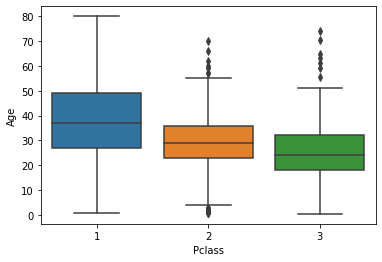

In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
tit = pd.read_csv('titanic.csv') #SibSb - родственники 2 Parch - родственники 1 Fare - стоимость билета
x = tit['SibSp']
y = tit['Parch']
x = np.array(x)
y = np.array(y)
x=x+y
tit['FamNum'] = x

count=['Survived','Pclass','Age','SibSp','Parch','Fare','FamNum']
sns.boxplot(y='Age', x='Pclass', data=tit)

pd.pivot_table(tit, index=['Pclass'], values = ['Survived'], aggfunc=np.sum)
tit['Pclass'] = tit['Pclass'].replace([1,2,3],['Элита','Человек','Работяга'])
tit.head()

In [40]:
tit.loc?

Распределение выживших/умерших по возрасту
То есть количесвто людей / возраст

In [41]:
import matplotlib.pyplot as plt
#plt.hist([], histtype='barstacked', density = True)
themaPro = pd.DataFrame([],columns = ['Survived','Age'])

In [42]:
#cut_bins = np.arange(0, 100, 2.5)
#pd.cut(tit['Age'], bins=cut_bins).value_counts(sort=False).plot.line()
Dead = []
Surv = []
for i in range(tit.shape[0]):
  if tit['Survived'][i] == 1:
    Surv.append(tit['Age'][i])
  else:
    Dead.append(tit['Age'][i])


In [43]:
Surv = pd.DataFrame(Surv)
Dead = pd.DataFrame(Dead)

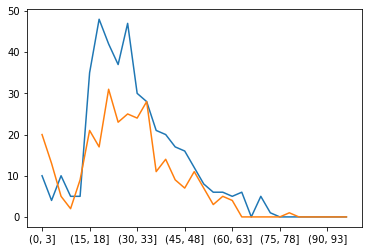

In [67]:
cut_bins = np.arange(0, 100, 3)
pd.cut(Dead[0], bins=cut_bins).value_counts(sort=False).plot.line()
pd.cut(Surv[0], bins=cut_bins).value_counts(sort=False).plot.line()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 2., 11.,  3., 10.,  3., 16., 40., 48., 44., 39., 38., 29., 24.,
         24., 15., 18., 13., 13.,  7.,  6.,  7.,  4.,  4.,  3.,  2.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [12., 15.,  7.,  4.,  4., 13., 24., 19., 26., 24., 26., 22., 23.,
         16.,  9.,  8., 11., 10.,  5.,  5.,  2.,  4.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.]]),
 array([-1,  2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47,
        50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98]),
 <a list of 2 Lists of Patches objects>)

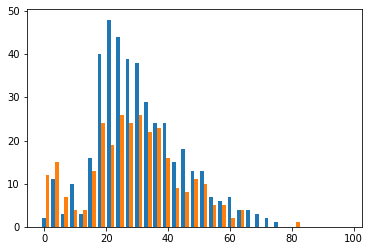

In [66]:
cut_bins = np.arange(-1, 100, 3)
plt.hist([Dead,Surv], bins=cut_bins, histtype='bar')